Die Firma HU Schrauben GmbH produziert eine Schraubensorte für besondere
Anwendungen. Bei der Produktion der Schrauben kommt es aufgrund des komplizierten
Herstellungsverfahrens immer zu leichten Schwankungen der Schraubenlänge. In einer
Stichprobe von 11 Schrauben wurden folgende Längen gemessen:

88, 92, 92, 86, 92, 85, 91, 90, 92, 90, 92

Die Produktionsleitung geht davon aus, dass die Länge 𝘟 der Schrauben einer
Normalverteilung 𝘟 ~ 𝛮(𝜇, 𝜎2) folgt.

a) Geben Sie das arithmetische Mittel und den Median der Stichprobe an.

In [1]:
import math as m
def custom_function_arithmetisches_mittel_sample(input_list):
    return sum(input_list)/len(input_list)

def custom_function_median(input_list):
    sorted_input_list = input_list
    sorted_input_list.sort()
    if len(sorted_input_list) % 2 == 0:
        return (sorted_input_list[len(sorted_input_list)/2] + sorted_input_list[(len(sorted_input_list)/2) + 1])/2
    else:
        return sorted_input_list[m.trunc(len(sorted_input_list)/2)]
        

stichprobe_schrauben = [88, 92, 92, 86, 92, 85, 91, 90, 92, 90, 92]

print("arithmetisches Mittel Stichprobe: " + str(custom_function_arithmetisches_mittel_sample(stichprobe_schrauben)))
print("Median Stichprobe: " + str(custom_function_median(stichprobe_schrauben)))


arithmetisches Mittel Stichprobe: 90.0
Median Stichprobe: 91


b) Schätzen Sie den Mittelwert, die Standardabweichung und die Varianz der
Normalverteilung anhand des gegebenen Samples.


In [2]:
def custom_function_varianz_sample(input_list):
    mittelwert = custom_function_arithmetisches_mittel_sample(input_list)
    input_list_temp = list(map(lambda x: (x - mittelwert)**2, input_list))
    return (sum(input_list_temp)/(len(input_list_temp) - 1))

def custom_function_standardabweichung_sample(input_list):
    return m.sqrt(custom_function_varianz_sample(stichprobe_schrauben))

print("Mittelwert Stichprobe: " + str(custom_function_arithmetisches_mittel_sample(stichprobe_schrauben)))
print("Varianz Stichprobe: " + str(custom_function_varianz_sample(stichprobe_schrauben)))
print("Standardabweichung Stichprobe: " + str(custom_function_standardabweichung_sample(stichprobe_schrauben)))

Mittelwert Stichprobe: 90.0
Varianz Stichprobe: 6.6
Standardabweichung Stichprobe: 2.569046515733026


Neben den Schrauben ist die Firma vor kurzem auch in die Produktion von Nägeln
eingestiegen. Hierzu wurde eine Produktionsmaschine gekauft, welche Nägel der Länge 𝘛
erzeugt. Die Länge 𝘛 der Nägel ist normalverteilt 𝘛 ~ 𝛮(𝜇, 𝜎2) mit 𝜇 = 70mm und 𝜎 = 2mm.

c) Wieviel Prozent der Nägel sind kürzer als 69mm?


30.85372520744149% der Nägel sind kürzer als 69mm


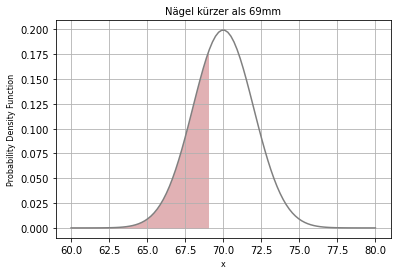

In [3]:
from scipy.integrate import quad

import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


def normal_distribution_function(x,mean,std):
    value = scipy.stats.norm.pdf(x,mean,std)
    return value

x_min = 60.0
x_max = 80.0

obere_schranke = 69
untere_schranke = x_min

mean = 70.0 
std = 2.0


ptx = np.linspace(x_min, x_max, 100)
pty = scipy.stats.norm.pdf(ptx,mean,std)

ptx1 = np.linspace(untere_schranke, obere_schranke, 100)
pty1 = scipy.stats.norm.pdf(ptx1,mean,std)

plt.plot(ptx,pty, color='gray')

plt.fill_between(ptx1, pty1, color='#e1b1b4', alpha=1.0)

plt.grid()

plt.title('Nägel kürzer als 69mm', fontsize=10)
plt.xlabel('x', fontsize=8)
plt.ylabel('Probability Density Function', fontsize=8)

res, err = quad(normal_distribution_function, x_min, obere_schranke, args=(mean,std,))

print(str(res * 100) + "% der Nägel sind kürzer als 69mm")

plt.show()

d) Wieviel Prozent der Nägel sind länger als 73mm?


6.68069146172862% der Nägel sind länger als 73mm


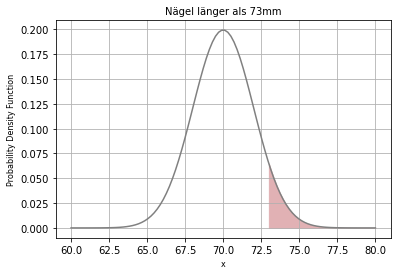

In [4]:
obere_schranke = x_max
untere_schranke = 73


ptx1 = np.linspace(untere_schranke, obere_schranke, 100)
pty1 = scipy.stats.norm.pdf(ptx1,mean,std)

plt.plot(ptx,pty, color='gray')

plt.fill_between(ptx1, pty1, color='#e1b1b4', alpha=1.0)

plt.grid()

plt.title('Nägel länger als 73mm', fontsize=10)
plt.xlabel('x', fontsize=8)
plt.ylabel('Probability Density Function', fontsize=8)

res, err = quad(normal_distribution_function, untere_schranke, obere_schranke, args=(mean,std,))

print(str(res * 100) + "% der Nägel sind länger als 73mm")

plt.show()

e) Wie groß müsste µ bei gleichem σ sein, damit nur 10% der Nägel kürzer als 70mm
sind?

73


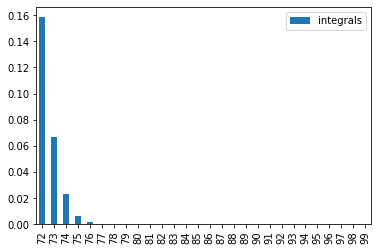

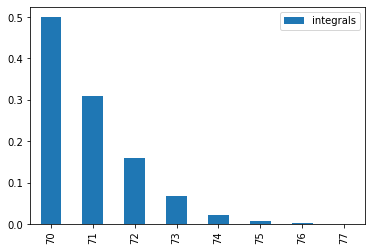

In [5]:
import pandas as pd

start_val = 0.0
obere_schranke = 70
untere_schranke = 0

distributions = [(quad(normal_distribution_function, untere_schranke, obere_schranke, args=(x,std,)))[0] for x in range(0,100)]

df = pd.DataFrame(distributions, columns = ["integrals"])

df.loc[df["integrals"] < 0.20 ].plot(kind="bar")

df[70:78].plot(kind="bar")

print("73")

6.6807201228698165% der Nägel sind kürzer als 70mm wenn µ zwischen kleiner als 73mm ist


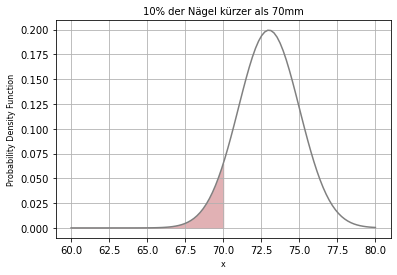

In [6]:
mean = 73
obere_schranke = 70
untere_schranke = x_min

ptx = np.linspace(x_min, x_max, 100)
pty = scipy.stats.norm.pdf(ptx,mean,std)

ptx1 = np.linspace(untere_schranke, obere_schranke, 100)
pty1 = scipy.stats.norm.pdf(ptx1,mean,std)

plt.plot(ptx,pty, color='gray')

plt.fill_between(ptx1, pty1, color='#e1b1b4', alpha=1.0)

plt.grid()

plt.title('10% der Nägel kürzer als 70mm', fontsize=10)
plt.xlabel('x', fontsize=8)
plt.ylabel('Probability Density Function', fontsize=8)

res, err = quad(normal_distribution_function, untere_schranke, obere_schranke, args=(mean,std,))

print(str(res * 100) + "% der Nägel sind kürzer als 70mm wenn µ zwischen kleiner als 73mm ist")

plt.show()